### Name : Akanksha Kedari

### The Spark Foundation GRIPMarch21

### Data Science and Business Analytics Intern at The Spark Foundation

### Task 1 : Prediction using Supervised ML

### Predict the percentage of a student based on the number of study hours

### Importing the Libraries

#### We will start by importing all the libraries required for the task

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Now we will read the data from the remote link

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


### Data Overview

In [3]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### Next we will plot our data points on 2d graph and see if we can find any relationship between the data

#### By using plot() function of the pandas dataframe and we will pass it to the column names for x-coordinate i.e ''Hours" and y-coordinate i.e "Scores"

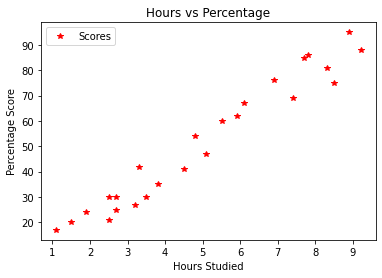

In [6]:
data.plot(x='Hours', y='Scores', style='*',color='red')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#### So from the above graph we can conclude that their is a linear relationship between hours studied and score.

#### Next is to divide the data into attributes and labels. Attributes are the independent variables and labels are dependent variables. Dependent variables are the ones whose values are predicted. In our dataset we want to predict the percentage score. So in our dataset attributes will be the "Hours" column and labels will be the "Score" column. 

In [7]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 

In [8]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [9]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

#### Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:. The below code will split 80 % of the data to training set and 20 % of the data to the test set. 

In [10]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

#### We have split our data into training and testing sets, and now is finally the time to train our algorithm.


In [11]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print("Training complete.")

Training complete.


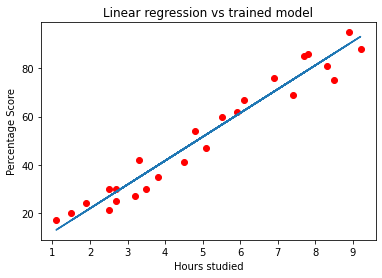

In [12]:
line = regressor.coef_*X+regressor.intercept_
plt.title("Linear regression vs trained model")
plt.scatter(X, y,color='red')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.plot(X, line);
plt.show()

### Predictions

#### We have trained our algorithms. now we will make the predictions. Y pred is a numpy array that contains all the predicted values for the input values in the X_test series

In [13]:
print(X_test) 
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [14]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [15]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


<AxesSubplot:>

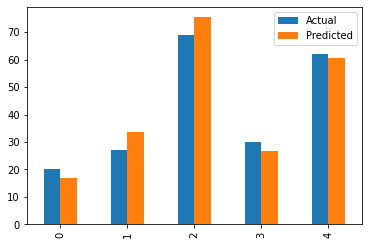

In [16]:
df.plot(kind='bar') 

In [17]:
hours = 9.25
test=np.array([hours])
test=test.reshape(-1,1)
pred = regressor.predict([[9.5]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 96.16939660753593


### Evaluating the model

#### The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics. For regression algorithms three evaluation metrics are commonly used. 1. Mean Absolute error 2. Mean Squared error 3. Root Mean Squared error

In [18]:
from sklearn import metrics  

In [19]:
print('Mean Absolute Error Is : ' , metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error Is : ' , metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error Is : ' , np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

Mean Absolute Error Is :  4.183859899002975
Mean Squared Error Is :  21.5987693072174
Root Mean Squared Error Is :  2.0454485813637495


In [20]:
print("Slope of Regression Line ",regressor.coef_)
print("Y-intercept Of Regression Line",regressor.intercept_)

Slope of Regression Line  [9.91065648]
Y-intercept Of Regression Line 2.018160041434683
